# Project : Analyzing the trends of COVID-19 with Python

# Problem Statement:
    Given data about COVID-19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends.

# Dataset:

CSV and Excel files containing data about the number of COVID-19 confirmed deaths and recovered patients both around the world and in India. Download Link

# Guidelines:
 

    ● Use pandas to accumulate data from multiple data files.
    ● Use plotly (visualization library) to create interactive visualizations.
    ● Use Facebook prophet library to make time series models.
    ● Visualize the prediction by combining these technologies.


# Data Preprocessing Steps And Inspiration

The preprocessing of the data included the following steps:
1. First step : Imported all required library

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import CSV_EDA  # Created a python class Called CSV_EDA for Data reading, cleaning and processing.

#  I have created the following local methods for reusable purpose in a separate python file CSV_EDA.py
####    1. ReadCSVFile :- I have used this class to read csv using constructor.
####    2. getdata     :- This method is used to return data frame from the file received using class ReadCSVFile.
####    3. getForcast  :- I have used the getForcast method for forcasting cases(Confirmed,Active,Death) for all contries and same method can be used to forcast country-wise
####    4. plotForcastUsingPlotly :- This function will be used to Visualize the prediction using plotly
####    5. plotTopContriesCases : This method is used to plot top x countries cases.

# 1. Use pandas to accumulate data from multiple data files.

## 1.1 Geeting data from file full_grouped.csv

In [2]:
full_grouped_obj = CSV_EDA.ReadCSVFile('intellipaat/full_grouped.csv')

In [3]:
full_grouped_df = full_grouped_obj.getdata()

In [4]:
full_grouped_df.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

In [5]:
full_grouped_df.shape

(35156, 10)

In [6]:
full_grouped_df["Country/Region"].nunique()

187

## 1.2 Geeting data from file usa_county_wise.csv

In [7]:
usa_county_wise_obj = CSV_EDA.ReadCSVFile('intellipaat/usa_county_wise.csv')

In [8]:
usa_county_wise_df = usa_county_wise_obj.getdata()

In [9]:
usa_county_wise_df.head()

UID iso2 iso3  code3     FIPS    Admin2            Province_State  \
0        16   AS  ASM     16     60.0       NaN            American Samoa   
1       316   GU  GUM    316     66.0       NaN                      Guam   
2       580   MP  MNP    580     69.0       NaN  Northern Mariana Islands   
3  63072001   PR  PRI    630  72001.0  Adjuntas               Puerto Rico   
4  63072003   PR  PRI    630  72003.0    Aguada               Puerto Rico   

  Country_Region        Lat       Long_                  Combined_Key  \
0             US -14.271000 -170.132000            American Samoa, US   
1             US  13.444300  144.793700                      Guam, US   
2             US  15.097900  145.673900  Northern Mariana Islands, US   
3             US  18.180117  -66.754367     Adjuntas, Puerto Rico, US   
4             US  18.360255  -67.175131       Aguada, Puerto Rico, US   

      Date  Confirmed  Deaths  
0  1/22/20          0       0  
1  1/22/20          0       0  
2  1/22/20          0       0  
3  1/22/20          0       0  
4  1/22/20          0       0

### 1.2.1 Grouping data to make USA as one country

In [10]:
usa_df =usa_county_wise_df.groupby(["Date"])["Confirmed","Deaths"].sum() #"Province_State",

In [11]:
usa_df = usa_df.reset_index()

In [12]:
usa_df["Country/Region"] ="US"

### 1.2.2 Adding Active column as it is missing in the usa_county_wise data set.

In [13]:
usa_df["Active"] = usa_df["Confirmed"] - usa_df["Deaths"]

### 1.2.3 Adding Recovered column as it is missing in the usa_county_wise data set.

In [14]:
# Added Recovered field as there is no Recovered field in the usa_county_wise.csv 
usa_df["Recovered"] = 0

In [15]:
usa_df.tail()

Date  Confirmed  Deaths Country/Region   Active  Recovered
183  7/5/20    2891124  129960             US  2761164          0
184  7/6/20    2936077  130285             US  2805792          0
185  7/7/20    2996098  131480             US  2864618          0
186  7/8/20    3054699  132300             US  2922399          0
187  7/9/20    3117946  133290             US  2984656          0

### 1.2.4 Converting Date column from string to datetime format

In [16]:
usa_df["Date"]=pd.to_datetime(usa_df["Date"],  dayfirst=True).dt.strftime('%Y-%m-%d') #format='%Y-%m-%d' format='%d/%m/%y',

In [17]:
usa_df.tail()

Date  Confirmed  Deaths Country/Region   Active  Recovered
183  2020-05-07    2891124  129960             US  2761164          0
184  2020-06-07    2936077  130285             US  2805792          0
185  2020-07-07    2996098  131480             US  2864618          0
186  2020-08-07    3054699  132300             US  2922399          0
187  2020-09-07    3117946  133290             US  2984656          0

### 1.2.5 Mergeing two USA data [usa_df] and all other countries data [ full_grouped_df]

In [18]:

full_grouped_df.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

In [19]:
full_grouped_df.shape

(35156, 10)

### 1.2.6 Exracting same column from the dataframe full_grouped_df as in usa_df dataframe.

In [20]:
all_country_data = full_grouped_df.loc[0:35156,["Date","Confirmed","Deaths","Country/Region","Active","Recovered"]]

In [21]:
all_country_data.head()

Date  Confirmed  Deaths Country/Region  Active  Recovered
0  2020-01-22          0       0    Afghanistan       0          0
1  2020-01-22          0       0        Albania       0          0
2  2020-01-22          0       0        Algeria       0          0
3  2020-01-22          0       0        Andorra       0          0
4  2020-01-22          0       0         Angola       0          0

In [22]:
usa_df.head()

Date  Confirmed  Deaths Country/Region  Active  Recovered
0  2020-01-22          1       0             US       1          0
1  2020-01-23          1       0             US       1          0
2  2020-01-24          2       0             US       2          0
3  2020-01-25          2       0             US       2          0
4  2020-01-26          5       0             US       5          0

In [23]:
# Merging both USA data and other countries data together.
all_country_data = pd.concat([all_country_data, usa_df]) #axis="columns"

In [24]:
all_country_data.head()

Date  Confirmed  Deaths Country/Region  Active  Recovered
0  2020-01-22          0       0    Afghanistan       0          0
1  2020-01-22          0       0        Albania       0          0
2  2020-01-22          0       0        Algeria       0          0
3  2020-01-22          0       0        Andorra       0          0
4  2020-01-22          0       0         Angola       0          0

In [25]:
all_country_data.tail()

Date  Confirmed  Deaths Country/Region   Active  Recovered
183  2020-05-07    2891124  129960             US  2761164          0
184  2020-06-07    2936077  130285             US  2805792          0
185  2020-07-07    2996098  131480             US  2864618          0
186  2020-08-07    3054699  132300             US  2922399          0
187  2020-09-07    3117946  133290             US  2984656          0

# 1.3 Geeting data from file country_wise_latest.csv

In [26]:
country_wise_latest_obj = CSV_EDA.ReadCSVFile('intellipaat/country_wise_latest.csv') 

country_wise_latest_df = country_wise_latest_obj.getdata()
country_wise_latest_df.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

### 1.3.1 There is no date column, hence we take max date from all country data and the latest data will be next day of the max date

In [27]:
all_country_data.Date.max()

'2020-12-07'

### 1.3.2 Asuming that latest data will be for 07th December 2020 in the data file country_wise_latest.csv and the data frame country_wise_latest_df
### Adding Date column in the country_wise_latest_df data frame

In [28]:

country_wise_latest_df["Date"] = pd.to_datetime(all_country_data.Date.max(), format='%Y-%m-%d') + pd.Timedelta(days=1)

In [29]:
country_wise_latest_df.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region       Date  
0               2.07  Eastern Mediterranean 2020-12-08  
1              17.00                 Europe 2020-12-08  
2              18.07                 Africa 2020-12-08  
3               2.60                 Europe 2020-12-08  
4              26.84                 Africa 2020-12-08

### 1.3.3 Exracting same columns from the dataframe country_wise_latest_df as in all_country_data dataframe.

In [30]:
country_wise_latest_df =country_wise_latest_df.loc[0:187,["Date","Confirmed","Deaths","Country/Region","Active","Recovered"]]

In [31]:
country_wise_latest_df

Date  Confirmed  Deaths      Country/Region  Active  Recovered
0   2020-12-08      36263    1269         Afghanistan    9796      25198
1   2020-12-08       4880     144             Albania    1991       2745
2   2020-12-08      27973    1163             Algeria    7973      18837
3   2020-12-08        907      52             Andorra      52        803
4   2020-12-08        950      41              Angola     667        242
..         ...        ...     ...                 ...     ...        ...
182 2020-12-08      10621      78  West Bank and Gaza    6791       3752
183 2020-12-08         10       1      Western Sahara       1          8
184 2020-12-08       1691     483               Yemen     375        833
185 2020-12-08       4552     140              Zambia    1597       2815
186 2020-12-08       2704      36            Zimbabwe    2126        542

[187 rows x 6 columns]

In [32]:
country_wise_latest_df.shape

(187, 6)

In [33]:
all_country_data["Country/Region"].nunique()

187

In [34]:
all_country_data.shape

(35344, 6)

In [35]:
# all_country_data
all_country_df = pd.concat([all_country_data, country_wise_latest_df]) #axis="columns"

In [36]:
all_country_df["Date"]=pd.to_datetime(all_country_df["Date"],  format='%Y-%m-%d')

In [37]:
all_country_df.head()

Date  Confirmed  Deaths Country/Region  Active  Recovered
0 2020-01-22          0       0    Afghanistan       0          0
1 2020-01-22          0       0        Albania       0          0
2 2020-01-22          0       0        Algeria       0          0
3 2020-01-22          0       0        Andorra       0          0
4 2020-01-22          0       0         Angola       0          0

In [38]:
all_country_df.tail()

Date  Confirmed  Deaths      Country/Region  Active  Recovered
182 2020-12-08      10621      78  West Bank and Gaza    6791       3752
183 2020-12-08         10       1      Western Sahara       1          8
184 2020-12-08       1691     483               Yemen     375        833
185 2020-12-08       4552     140              Zambia    1597       2815
186 2020-12-08       2704      36            Zimbabwe    2126        542

In [39]:
all_country_df.rename(columns={"Country/Region":"Country"},inplace=True)

In [40]:
all_country_df.head()

Date  Confirmed  Deaths      Country  Active  Recovered
0 2020-01-22          0       0  Afghanistan       0          0
1 2020-01-22          0       0      Albania       0          0
2 2020-01-22          0       0      Algeria       0          0
3 2020-01-22          0       0      Andorra       0          0
4 2020-01-22          0       0       Angola       0          0

In [41]:
all_country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35531 entries, 0 to 186
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       35531 non-null  datetime64[ns]
 1   Confirmed  35531 non-null  int64         
 2   Deaths     35531 non-null  int64         
 3   Country    35531 non-null  object        
 4   Active     35531 non-null  int64         
 5   Recovered  35531 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.9+ MB


# 2 Use plotly (visualization library) to create interactive visualizations.

### 2.1 plotTopContriesCases will be used to visualize Confirmed cases of top 20 countries.

In [42]:
# def plotTopContriesCases(data,case="Confirmed", top=20):
#     top_cases = data.groupby(by="Country")[case].sum().sort_values(ascending=False).head(top).reset_index()
#     fig = px.line(top_cases, x='Country', y=[case]) #,"Deaths",'Recovered',"Active"
#     fig.show()

In [56]:
country_wise_latest_obj.plotTopContriesCases(data=all_country_df,case="Confirmed", top=20)

### 2.2 plotTopContriesCases will be used to visualize Active cases of top 20 countries.

In [59]:
country_wise_latest_obj.plotTopContriesCases(data=all_country_df,case="Active", top=20)

### 2.3 plotTopContriesCases will be used to visualize Deaths cases of top 20 countries.

In [60]:
country_wise_latest_obj.plotTopContriesCases(data=all_country_df,case="Deaths", top=20)

### 2.4 plotTopContriesCases will be used to visualize Recovered cases of top 20 countries.

In [61]:
country_wise_latest_obj.plotTopContriesCases(data=all_country_df,case="Recovered", top=20)

### 2.4 Below visualize is used to seel all cases of all countries.

In [62]:
# removing timestamp from Date column
all_country_df["Date"] = all_country_df["Date"].dt.date

<Axes: >

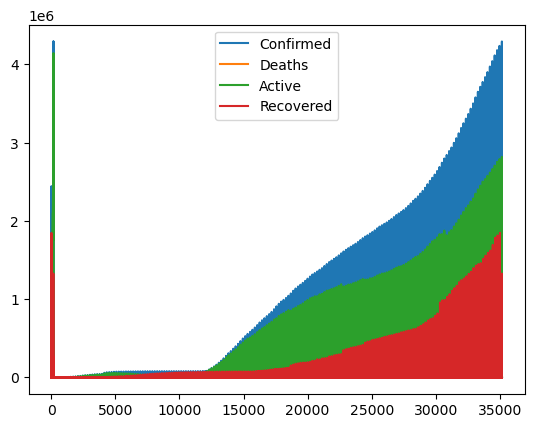

In [63]:
all_country_df.plot()

In [64]:
fig = px.line(all_country_df, x='Date', y=["Confirmed","Deaths","Active","Recovered"]) #"Country",
fig.show()

In [66]:
day_wise_obj = CSV_EDA.ReadCSVFile('intellipaat/day_wise.csv')

In [67]:
day_wise_data = day_wise_obj.getdata()

In [68]:
day_wise_data.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020-01-22        555      17         28     510          0           0   
1  2020-01-23        654      18         30     606         99           1   
2  2020-01-24        941      26         36     879        287           8   
3  2020-01-25       1434      42         39    1353        493          16   
4  2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [69]:
day_wise_data.shape

(188, 12)

### 2.5 Below visualize is used to seel cases["New recovered","Deaths / 100 Cases",'Recovered / 100 Cases',"No. of countries"]  of all countries.

In [70]:
fig = px.line(day_wise_data, x='Date', y=["New recovered","Deaths / 100 Cases",'Recovered / 100 Cases',"No. of countries"])
fig.show()

### 2.6 Below visualize is used to seel cases["Confirmed","Deaths",'Recovered',"Active"]  of all countries.

In [71]:
# df = px.data.stocks()
fig = px.line(day_wise_data, x='Date', y=["Confirmed","Deaths",'Recovered',"Active"])
fig.show()

### 2.7 Below visualize is used to see Active vs Recovered cases of all countries.

In [72]:
fig = px.line(x=day_wise_data["Active"] ,y =day_wise_data["Recovered"],labels={'x':'Active', 'y':'Recovered'})
fig.show()

### 2.8 Below visualize is used to see Deaths vs Recovered cases of all countries.

In [73]:
fig = px.line(x=day_wise_data["Recovered"] ,y =day_wise_data["Deaths"],labels={'x':'Recovered', 'y':'Deaths'})
fig.show()

### 2.9 Below visualize is used to see Confirmed vs Recovered cases of all countries.

In [74]:
fig = px.line(x=day_wise_data["Confirmed"] ,y =day_wise_data["Recovered"],labels={'x':'Confirmed', 'y':'Recovered'})
fig.show()

In [75]:
# day_wise_data.plot()

### 2.10 Reading and analysing data from worldometer_data.csv 

In [76]:
worldometer_obj = CSV_EDA.ReadCSVFile('intellipaat/worldometer_data.csv') 

worldometer_df = worldometer_obj.getdata()
worldometer_df.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [77]:
worldometer_df.shape

(209, 16)

### 2.11 Blow plot is shoing countrywise "TotalCases","NewCases","TotalDeaths","NewDeaths","TotalRecovered" cases.

In [78]:
fig = px.line(worldometer_df, x='Country/Region', y=["TotalCases","NewCases","TotalDeaths","NewDeaths","TotalRecovered"])
fig.show()

### 2.12 Blow plot is shoing countrywise "Population","ActiveCases","TotalRecovered","TotalDeaths","TotalTests" cases.

In [79]:
fig = px.line(worldometer_df, x='Country/Region', y=["Population","ActiveCases","TotalRecovered","TotalDeaths","TotalTests"])
fig.show()

### 2.13 Blow plot is shoing country vs TotalDeaths cases

In [80]:
fig = px.line(x=worldometer_df["Country/Region"] ,y =worldometer_df["TotalDeaths"],labels={'x':'Country/Region', 'y':'TotalDeaths'})
fig.show()

### 2.14 Blow plot is shoing country vs TotalTests

In [81]:
fig = px.line(x=worldometer_df["Population"] ,y =worldometer_df["TotalTests"],labels={'x':'Population', 'y':'TotalTests'})
fig.show()

# 3 Use Facebook prophet library to make time series models.

### 3.1 Introduction on Time Series Forecasting
A time series is a collection of data points that are recorded over time and can be used to identify patterns and trends. Time series analysis is a statistical technique that can be used to extract meaningful insights from such data. It can help identify the factors that influence certain variables over time, such as asset prices, economic indicators, or other variables. By analyzing time series data, we can gain a better understanding of how these variables change over time and make more informed decisions based on this knowledge.

As we can see the data that shows weekly sales based on specific time, hece I will use Time Series Forecasting algorith to predict the sales.

### 3.2 About Probhet
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

### 3.3. Reading the data by calling class CSV_EDA.ReadCSVFile using csvReader object

In [82]:
csvRader = CSV_EDA.ReadCSVFile('covid_19_clean_complete.csv')

##### 3.3.1 getdata method returns data frame after reading Walmart.csv file and assigned the dataframe into w_data variable.

In [83]:
covid_19_df = csvRader.getdata()
# w_data

In [84]:
covid_19_df.shape

(49068, 10)

##### 3.3.2. viewing the first 5 records from the dataframe.

In [85]:
covid_19_df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

##### 3.3.3 Analysig data statistics 

In [86]:
covid_19_df.nunique()

Province/State       78
Country/Region      187
Lat                 260
Long                261
Date                188
Confirmed         10861
Deaths             3640
Recovered          7609
Active             8641
WHO Region            6
dtype: int64

##### 3.3.4. Checking duplicate where it shows no duplicate records

In [87]:
covid_19_df.duplicated().sum()

0

##### 3.3.5. Checking if there is any null values

In [88]:
covid_19_df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

##### 3.3.6. Checking data information details.

In [89]:
covid_19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


##### 3.3.7. Converting Date column from Object to datetime format

In [90]:
covid_19_df["Date"]=pd.to_datetime(covid_19_df["Date"], format='%Y-%m-%d')
# 2020-01-22

In [91]:
covid_19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [92]:
covid_19_df.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

<!-- ###### Description for the XYZ algorithm for the project. -->

#### 3.3.8 I have created the following local methods for reusable purpose in a separate python file CSV_EDA.py
    1. getForcast :- I have used the getForcast method for forcasting cases(Confirmed,Active,Death) for all contries and same method can be used to forcast country-wise
    2. plotForcastUsingPlotly :- This function will be used to Visualize the prediction using plotly

#### 3.3.9 Technique 2.1 : Rename column Country/Region to Country and Province/State to Province

In [93]:
covid_19_df.rename(columns={"Country/Region":"Country","Province/State":"Province"},inplace=True)

In [94]:
covid_19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Province    14664 non-null  object        
 1   Country     49068 non-null  object        
 2   Lat         49068 non-null  float64       
 3   Long        49068 non-null  float64       
 4   Date        49068 non-null  datetime64[ns]
 5   Confirmed   49068 non-null  int64         
 6   Deaths      49068 non-null  int64         
 7   Recovered   49068 non-null  int64         
 8   Active      49068 non-null  int64         
 9   WHO Region  49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


#### 3.3.10 Technique 2.2 : Applying Date column as index of the dataframe.

In [95]:
covid_19_df["Date"]=pd.to_datetime(covid_19_df["Date"], format='%Y-%m-%d')
covid_19_df.set_index('Date', inplace=True)
covid_19_df.head()

Province      Country       Lat       Long  Confirmed  Deaths  \
Date                                                                       
2020-01-22      NaN  Afghanistan  33.93911  67.709953          0       0   
2020-01-22      NaN      Albania  41.15330  20.168300          0       0   
2020-01-22      NaN      Algeria  28.03390   1.659600          0       0   
2020-01-22      NaN      Andorra  42.50630   1.521800          0       0   
2020-01-22      NaN       Angola -11.20270  17.873900          0       0   

            Recovered  Active             WHO Region  
Date                                                  
2020-01-22          0       0  Eastern Mediterranean  
2020-01-22          0       0                 Europe  
2020-01-22          0       0                 Africa  
2020-01-22          0       0                 Europe  
2020-01-22          0       0                 Africa

In [96]:
covid_19_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49068 entries, 2020-01-22 to 2020-07-27
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Province    14664 non-null  object 
 1   Country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   Confirmed   49068 non-null  int64  
 5   Deaths      49068 non-null  int64  
 6   Recovered   49068 non-null  int64  
 7   Active      49068 non-null  int64  
 8   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [97]:
covid_19_df.tail()

Province                Country        Lat       Long  Confirmed  \
Date                                                                          
2020-07-27      NaN  Sao Tome and Principe   0.186400   6.613100        865   
2020-07-27      NaN                  Yemen  15.552727  48.516388       1691   
2020-07-27      NaN                Comoros -11.645500  43.333300        354   
2020-07-27      NaN             Tajikistan  38.861000  71.276100       7235   
2020-07-27      NaN                Lesotho -29.610000  28.233600        505   

            Deaths  Recovered  Active             WHO Region  
Date                                                          
2020-07-27      14        734     117                 Africa  
2020-07-27     483        833     375  Eastern Mediterranean  
2020-07-27       7        328      19                 Africa  
2020-07-27      60       6028    1147                 Europe  
2020-07-27      12        128     365                 Africa

### 3.3.11. Technique 2.3 : Applying Prophet time serires prediction technique.

###### Prerquisite for applying Porphet model is to Install Prophet using followng command.
!pip install prophet

### 3.4. Technique 2.4 : I have used local method getForcast for forcasting cases(Confirmed,Active,Death) for all contries and same method can be used to forcast country-wise

#### 3.4.1. Technique 2.5 :The below getForcast is used to forcast Confirmed cases for all contries.

21:21:53 - cmdstanpy - INFO - Chain [1] start processing
21:21:53 - cmdstanpy - INFO - Chain [1] done processing


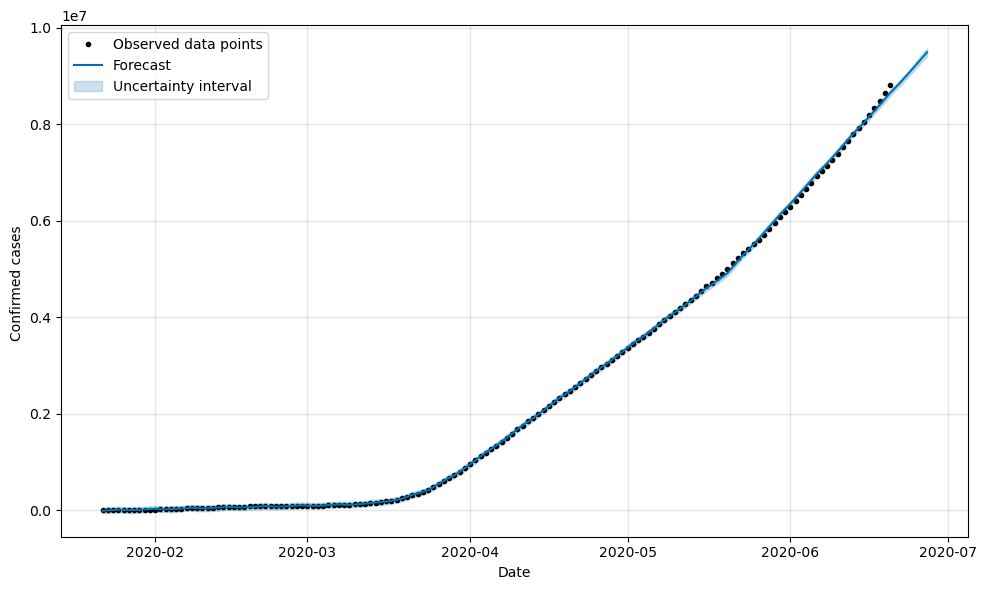

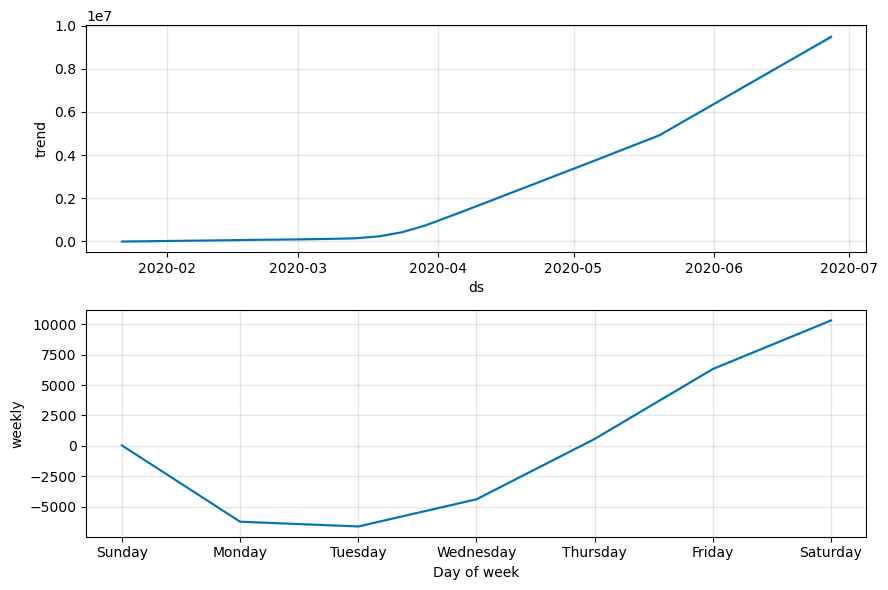

In [99]:
dropColumnList,train, test, future, forecast = csvRader.getForcast(data=covid_19_df,country=None, forcastColumn="Confirmed") #country=7,

In [100]:
train

ds        y
0   2020-01-22      555
1   2020-01-23      654
2   2020-01-24      941
3   2020-01-25     1434
4   2020-01-26     2118
..         ...      ...
146 2020-06-16  8185197
147 2020-06-17  8327050
148 2020-06-18  8466978
149 2020-06-19  8647784
150 2020-06-20  8805336

[151 rows x 2 columns]

# 4 Visualize the prediction by combining these technologies.

### 4.1 : The plotForcastUsingPlotly methos will plot Confirmed prediction for all countries

In [101]:
csvRader.plotForcastUsingPlotly(forcast_df=forecast, train_df=train,xlabel="Date", ylebel="Confirmed")

### 4.2 : Technique 2.6 :The below getForcast is used to forcast Deaths cases for South Africa

21:21:57 - cmdstanpy - INFO - Chain [1] start processing
21:21:57 - cmdstanpy - INFO - Chain [1] done processing


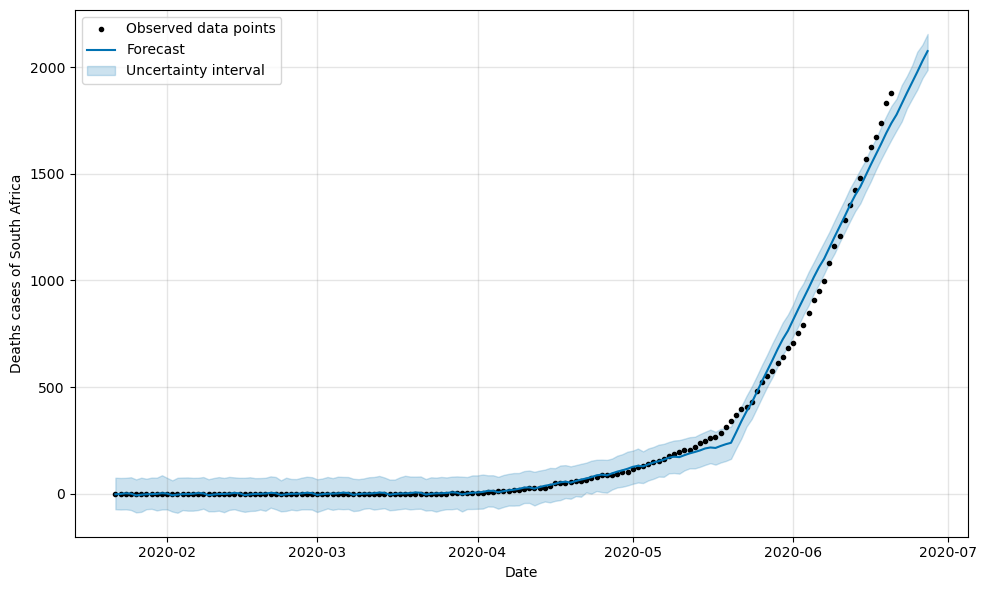

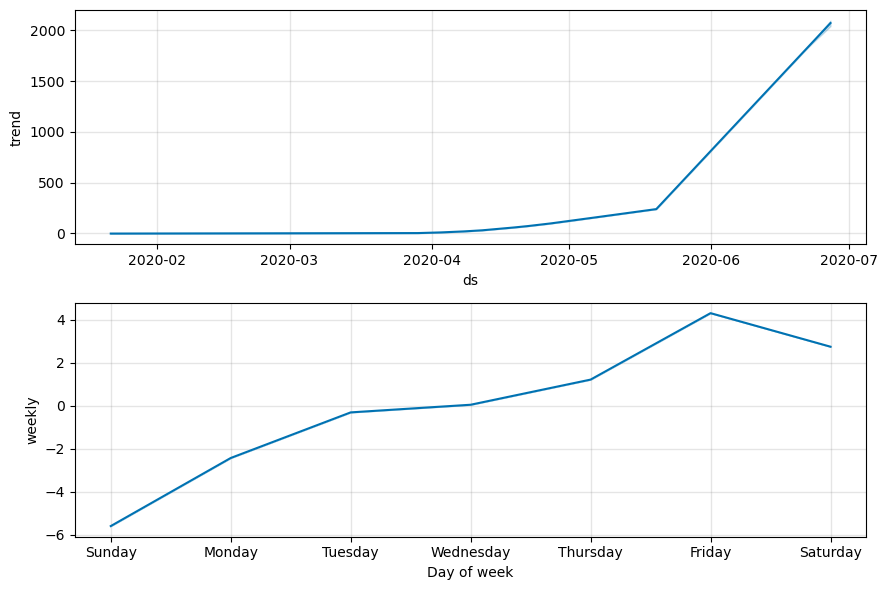

In [102]:
dropColumnList,train, test, future, forecast = csvRader.getForcast(data=covid_19_df,country="South Africa", forcastColumn="Deaths") #country=7,

In [103]:
dropColumnList

['Province',
 'Country',
 'Lat',
 'Long',
 'Confirmed',
 'Recovered',
 'Active',
 'WHO Region']

In [104]:
test.shape

(37, 9)

In [105]:
test

Province       Country      Lat     Long  Confirmed  Deaths  \
Date                                                                     
2020-06-21      NaN  South Africa -30.5595  22.9375      97302    1930   
2020-06-22      NaN  South Africa -30.5595  22.9375     101590    1991   
2020-06-23      NaN  South Africa -30.5595  22.9375     106108    2102   
2020-06-24      NaN  South Africa -30.5595  22.9375     111796    2205   
2020-06-25      NaN  South Africa -30.5595  22.9375     118375    2292   
2020-06-26      NaN  South Africa -30.5595  22.9375     124590    2340   
2020-06-27      NaN  South Africa -30.5595  22.9375     131800    2413   
2020-06-28      NaN  South Africa -30.5595  22.9375     138134    2456   
2020-06-29      NaN  South Africa -30.5595  22.9375     144264    2529   
2020-06-30      NaN  South Africa -30.5595  22.9375     151209    2657   
2020-07-01      NaN  South Africa -30.5595  22.9375     159333    2749   
2020-07-02      NaN  South Africa -30.5595  22.9375     168061    2844   
2020-07-03      NaN  South Africa -30.5595  22.9375     177124    2952   
2020-07-04      NaN  South Africa -30.5595  22.9375     187977    3026   
2020-07-05      NaN  South Africa -30.5595  22.9375     196750    3199   
2020-07-06      NaN  South Africa -30.5595  22.9375     205721    3310   
2020-07-07      NaN  South Africa -30.5595  22.9375     215855    3502   
2020-07-08      NaN  South Africa -30.5595  22.9375     224665    3602   
2020-07-09      NaN  South Africa -30.5595  22.9375     238339    3720   
2020-07-10      NaN  South Africa -30.5595  22.9375     250687    3860   
2020-07-11      NaN  South Africa -30.5595  22.9375     264184    3971   
2020-07-12      NaN  South Africa -30.5595  22.9375     276242    4079   
2020-07-13      NaN  South Africa -30.5595  22.9375     287796    4172   
2020-07-14      NaN  South Africa -30.5595  22.9375     298292    4346   
2020-07-15      NaN  South Africa -30.5595  22.9375     311049    4453   
2020-07-16      NaN  South Africa -30.5595  22.9375     324221    4669   
2020-07-17      NaN  South Africa -30.5595  22.9375     337594    4804   
2020-07-18      NaN  South Africa -30.5595  22.9375     350879    4948   
2020-07-19      NaN  South Africa -30.5595  22.9375     364328    5033   
2020-07-20      NaN  South Africa -30.5595  22.9375     373628    5173   
2020-07-21      NaN  South Africa -30.5595  22.9375     381798    5368   
2020-07-22      NaN  South Africa -30.5595  22.9375     394948    5940   
2020-07-23      NaN  South Africa -30.5595  22.9375     408052    6093   
2020-07-24      NaN  South Africa -30.5595  22.9375     421996    6343   
2020-07-25      NaN  South Africa -30.5595  22.9375     434200    6655   
2020-07-26      NaN  South Africa -30.5595  22.9375     445433    6769   
2020-07-27      NaN  South Africa -30.5595  22.9375     452529    7067   

            Recovered  Active WHO Region  
Date                                      
2020-06-21      51608   43764     Africa  
2020-06-22      53444   46155     Africa  
2020-06-23      55045   48961     Africa  
2020-06-24      56874   52717     Africa  
2020-06-25      59974   56109     Africa  
2020-06-26      64111   58139     Africa  
2020-06-27      67094   62293     Africa  
2020-06-28      68925   66753     Africa  
2020-06-29      70614   71121     Africa  
2020-06-30      73543   75009     Africa  
2020-07-01      76025   80559     Africa  
2020-07-02      81999   83218     Africa  
2020-07-03      86298   87874     Africa  
2020-07-04      91227   93724     Africa  
2020-07-05      93315  100236     Africa  
2020-07-06      97848  104563     Africa  
2020-07-07     102299  110054     Africa  
2020-07-08     106842  114221     Africa  
2020-07-09     113061  121558     Africa  
2020-07-10     118232  128595     Africa  
2020-07-11     127715  132498     Africa  
2020-07-12     134874  137289     Africa  
2020-07-13     138241  145383     Africa  
2020-07-14     146279  147667     Africa  
2020-0

In [106]:
#train data has 115 rows and 2 columns
train.shape 

(151, 2)

In [107]:
train.tail(20)

ds     y
131 2020-06-01   705
132 2020-06-02   755
133 2020-06-03   792
134 2020-06-04   848
135 2020-06-05   908
136 2020-06-06   952
137 2020-06-07   998
138 2020-06-08  1080
139 2020-06-09  1162
140 2020-06-10  1210
141 2020-06-11  1284
142 2020-06-12  1354
143 2020-06-13  1423
144 2020-06-14  1480
145 2020-06-15  1568
146 2020-06-16  1625
147 2020-06-17  1674
148 2020-06-18  1737
149 2020-06-19  1831
150 2020-06-20  1877

### 4.3 : The plotForcastUsingPlotly methos will plot Death prediction for South Africa

In [108]:
csvRader.plotForcastUsingPlotly(forcast_df=forecast, train_df=train,xlabel="Date", ylebel="Deaths")

# Assumptions
The following assumptions were made in order to create the model for Walmart project.


1. I will use the covid_19_clean_complete.csv data provided in LMS, which can be downloaded from there.It contains cleaned data for all countries for daywise covid-19 related all information.
2. As stated in the assignment, I will apply Prophet method to forecasting all cases for all countries or any specifc country.

# Model Evaluation and Technique
The following techniques and steps were involved in the evaluation of the model

The evaluation report suggests the following:
1. Inferences from the evaluation : This algorithm is very flexible as it allows us to add multiple seasonal components and additional regressors. This algorithm easily works with missing data with several outliers and it can generate results in seconds.

At its core, the Prophet procedure is an additive regression model with four main components:

A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.
A yearly seasonal component modeled using Fourier series.
A weekly seasonal component using dummy variables.
A user-provided list of important holidays.

# Inferences from the Project


Here are some of the key outcomes of the project:
The Dataset was quiet small with just 6435 samples & after preprocessing 7.5% of the datasamples were dropped.
Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
It is safe to use multiple regression algorithm performed better than other algorithms, as their scores were quiet comparable & also they're more generalisable.
Prophet follows the sklearn model API.
First up, we create an instance of the Prophet class and then call its fit and predict methods.
The input to Prophet is always a dataframe with two columns - ds and y.
The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.
The y column must be numeric, and represents the measurement we wish to forecast.

# Future Possibilities
The future possibilities, limitations, ….

Not all forecasting problems can be solved by the same procedure. Prophet is optimized for the business forecast tasks we have encountered at Facebook, which typically have any of the following characteristics:

    1.	hourly, daily, or weekly observations with at least a few months (preferably a year) of history
    2.	strong multiple “human-scale” seasonalities: day of week and time of year
    3.	important holidays that occur at irregular intervals that are known in advance (e.g. the Super Bowl)
    4.	a reasonable number of missing observations or large outliers
    5.	historical trend changes, for instance due to product launches or logging changes
    6.	trends that are non-linear growth curves, where a trend hits a natural limit or saturate
We have found Prophet’s default settings to produce forecasts that are often accurate as those produced by skilled forecasters, with much less effort. 


# Conclusion
This algorithm is very flexible as it allows us to add multiple seasonal components and additional regressors. This algorithm easily works with missing data with several outliers and it can generate results in seconds.

# References

1. Intellipaat Timeseries Class on 30th July 2023 - https://colab.research.google.com/drive/1BIqvyvpQNW6QQcCS-i7AHPuJq8JfNAzU
2. https://research.facebook.com/blog/2017/2/prophet-forecasting-at-scale/